# Vibration

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [39]:
folder_path = "C:/Users/qhrrl/CodeExamples/3.Paper/0.Dataset"

In [40]:
pd_vib_train = pd.read_csv(folder_path + '/vib_training_all.csv')
pd_vib_val = pd.read_csv(folder_path + '/vib_validation_all.csv')

In [41]:
print(pd_vib_train.shape)
print(len(pd_vib_train))
print(len(pd_vib_val))
print(len(pd_vib_train) + len(pd_vib_val))

(196032, 20)
196032
24522
220554


In [42]:
np_vib_train = pd_vib_train.to_numpy()
np_vib_val = pd_vib_val.to_numpy()

# Extract Labels

In [43]:
vib_train_labels = np_vib_train[:,-1]
vib_val_labels = np_vib_val[:, -1]

print(vib_train_labels)
print(vib_val_labels)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [9]:
pd_vib_train = pd_vib_train.drop(columns = ['Date','WATT','LABEL'])
pd_vib_val = pd_vib_val.drop(columns = ['Date','WATT','LABEL'])

In [10]:
vib_train = pd_vib_train.to_numpy()
vib_val = pd_vib_val.to_numpy()

# Vibration

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(vib_train, vib_train_labels, stratify=vib_train_labels, test_size=0.2, random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)

print("="*50)

print(y_train.shape)
print(y_test.shape)

print("="*50)

x_valid = vib_val
y_valid = vib_val_labels

print(x_valid.shape)
print(y_valid.shape)

(156825, 17)
(39207, 17)
(156825,)
(39207,)
(24522, 17)
(24522,)


# 1. 시각화

## 1.1 데이터 status 확인

In [14]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))  # classes = array([-1,  1])
classes

array([0, 1, 2, 3, 4], dtype=object)

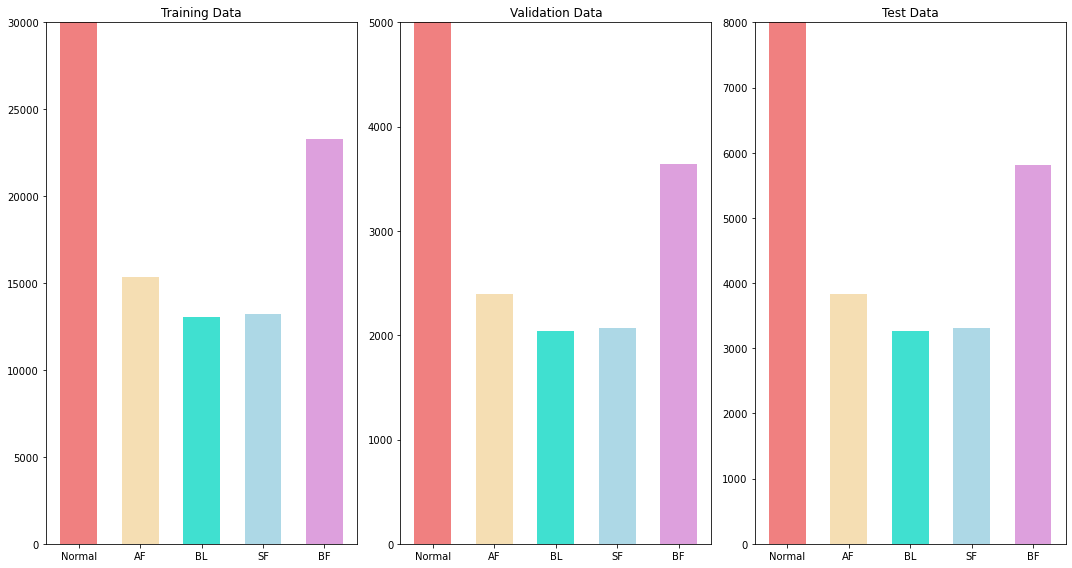

In [15]:
x = np.arange(len(classes))  # Plot의 X축의 개수 구하기

labels = ["Normal", "AF", "BL", "SF", "BF"]   # Plot의 X축의 이름 구하기

values_train = [(y_train == i).sum() for i in classes]  # Train 데이터의 정상/비정상 각 총 개수
values_valid = [(y_valid == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수
values_test = [(y_test == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수

plt.figure(figsize=(15,8))  # Plot 틀(Figure)의 Size 설정 (5X3)

plt.subplot(1,3,1)   # Plot 틀(Figure) 내 3개의 subplot 중 첫 번째(왼쪽) 지정
plt.title("Training Data")  # subplot 제목
plt.bar(x, values_train, width=0.6, color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Train 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 30000])
plt.xticks(x, labels)  # X축에 변수 기입

plt.subplot(1,3,2)  # Plot 틀(Figure) 내 3개의 subplot 중 두 번째(가운데) 지정
plt.title("Validation Data")
plt.bar(x, values_valid, width=0.6,color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 5000])
plt.xticks(x, labels)  

plt.subplot(1,3,3)  # Plot 틀(Figure) 내 3개의 subplot 중 세 번째(오른쪽) 지정
plt.title("Test Data")
plt.bar(x, values_test, width=0.6, color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 8000])
plt.xticks(x, labels)

plt.tight_layout()  # 그림 저장
plt.savefig('vib_100%_data_status.png', dpi=100, bbox_inches='tight')  # 그림 저장
plt.show()  # 그림 출력

## 1.2 99 : 1 으로 데이터 숫자 조정

In [44]:
print(pd_vib_train.shape)
print(pd_vib_val.shape)

(196032, 20)
(24522, 20)


In [45]:
vib_t_n = pd_vib_train.to_numpy()
vib_v_n = pd_vib_val.to_numpy()

In [46]:
vib_t_n

array([['2020-11-25 15:47:09', 0.0315034129, 0.002347813529083333, ...,
        0.0010451299699311383, 2.2, 0],
       ['2020-11-25 15:47:12', 0.0504048578, 0.0023553335490916674, ...,
        0.001068533498745394, 2.2, 0],
       ['2020-11-25 15:47:15', 0.0262582842, 0.002470758206791667, ...,
        0.0012941255982323327, 2.2, 0],
       ...,
       ['2020-11-26 16:54:01', 0.022809149700000003, 0.00572254773545,
        ..., 0.00011223286110158547, 2.2, 0],
       ['2020-11-26 16:54:04', 0.0225622766, 0.005705738201483333, ...,
        0.00013009163213372483, 2.2, 0],
       ['2020-11-26 16:54:07', 0.0236016549, 0.005701952535691665, ...,
        0.00012420017751837805, 2.2, 0]], dtype=object)

In [47]:
def label_extract(data):
    lb_1 = []
    lb_2 = []
    lb_3 = []
    lb_4 = []
    lb_0 = []
    for i in data:
        if i[:][-1] == 1:
            lb_1.append(i)
        elif i[:][-1] == 2:
            lb_2.append(i)
        elif i[:][-1] == 3:
            lb_3.append(i)
        elif i[:][-1] == 4:
            lb_4.append(i)
        elif i[:][-1] == 0:
            lb_0.append(i)
    return lb_1, lb_2, lb_3, lb_4, lb_0

In [48]:
lb_t_1, lb_t_2, lb_t_3, lb_t_4, lb_t_0 = label_extract(vib_t_n)
lb_v_1, lb_v_2, lb_v_3, lb_v_4, lb_v_0 = label_extract(vib_v_n)

In [49]:
lb_t_0

[array(['2020-11-25 15:47:09', 0.0315034129, 0.002347813529083333,
        0.041002911499999996, 0.002962774182266569, -0.25271191467705434,
        4.821786881713813, 13.839364385385633, 1.2619290866014123,
        13.418192079462125, 0.00016829375262705608, 0.000178610595075252,
        0.000777556612654774, 0.0005141223685124593,
        0.00021477376675667155, 0.0004078501182174904,
        0.00018583567181618485, 0.0010451299699311383, 2.2, 0],
       dtype=object),
 array(['2020-11-25 15:47:12', 0.0504048578, 0.0023553335490916674,
        0.0611808132, 0.003015599684020917, -0.6585604648418776,
        11.017264087519832, 20.288108373331305, 1.2803280814234916,
        21.400305625264245, 0.0005500046291910917, 0.00026242980774062244,
        0.0003809976161721126, 0.0004837859469869742,
        0.00016799241207051958, 0.00030871250863800763,
        0.00031081597760702315, 0.001068533498745394, 2.2, 0], dtype=object),
 array(['2020-11-25 15:47:15', 0.0262582842, 0.0024707582067

In [50]:
print("비정상1",len(lb_t_1) + len(lb_v_1))
print("비정상2",len(lb_t_2) + len(lb_v_2))
print("비정상3",len(lb_t_3) + len(lb_v_3))
print("비정상4",len(lb_t_4) + len(lb_v_4))
print("정상",len(lb_t_0) + len(lb_v_0))

비정상1 21558
비정상2 18379
비정상3 18583
비정상4 32723
정상 129311


In [24]:
print(len(pd_cur_train))
print(len(pd_cur_val))
print(len(lb_t_1) + len(lb_t_2)+len(lb_t_3) + len(lb_t_4) + len(lb_t_0))

305534
38210
21


In [21]:
print(len(lb_t_0) * 0.1)

2.1


반올림해서 0.4 제거 후 30553 중에서 4개의 유형으로 쪼개야 하니 

In [20]:
print(len(lb_t_0) * 0.01 / 4)

0.0525


각 데이터 당, 7638 개 씩 추출을 해야한다.

In [142]:
import random

lb_t_1 = random.sample(lb_t_1, 5454)
lb_t_2 = random.sample(lb_t_2, 5454)
lb_t_3 = random.sample(lb_t_3, 5454)
lb_t_4 = random.sample(lb_t_4, 5454)

In [143]:
print(len(lb_t_1))

5454


In [145]:
# 비교해보자 
print(len(lb_t_0) * 0.1)
print(len(lb_t_1) + len(lb_t_2)+len(lb_t_3) + len(lb_t_4))

21819.4
21816


다시 붙여주자 

In [150]:
pd_lb_t_0 = pd.DataFrame(lb_t_0)
pd_lb_t_1 = pd.DataFrame(lb_t_1)
pd_lb_t_2 = pd.DataFrame(lb_t_2)
pd_lb_t_3 = pd.DataFrame(lb_t_3)
pd_lb_t_4 = pd.DataFrame(lb_t_4)

cur_train_99 = pd.concat([pd_lb_t_0, pd_lb_t_1, pd_lb_t_2, pd_lb_t_3, pd_lb_t_4], axis=0)

In [151]:
cur_train_99

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,2020-11-13 07:43:41,3.643555,3.883789,4.124023,2.152260,2.154582,2.290735,7.126953,7.527344,7.687500,...,3.553066,3.763136,0.021705,0.023957,0.020911,0.057528,0.057195,0.057517,2.2,0
1,2020-11-13 07:43:41,3.643555,3.803711,4.164062,2.161249,2.163811,2.301946,7.126953,7.447266,7.727539,...,3.533756,3.747315,0.009876,0.010175,0.010687,0.011616,0.013211,0.010941,2.2,0
2,2020-11-13 07:43:41,3.683594,3.803711,4.164062,2.152920,2.151939,2.289333,7.166992,7.367188,7.727539,...,3.519853,3.728701,0.017622,0.011568,0.014016,0.012954,0.016530,0.011328,2.2,0
3,2020-11-13 07:44:42,3.553467,3.753662,3.993896,2.134172,2.111470,2.258483,6.966797,7.247070,7.487305,...,3.359254,3.581625,0.011735,0.008646,0.012069,0.008928,0.008072,0.006405,2.2,0
4,2020-11-13 07:44:42,3.593506,3.713623,4.073975,2.137425,2.114743,2.260646,7.006836,7.247070,7.607422,...,3.354816,3.573826,0.007737,0.006841,0.007718,0.011826,0.016674,0.015070,2.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,2021-01-02 04:14:59,4.814697,4.974854,5.114990,2.475715,2.530519,2.470080,9.569336,9.929688,9.769531,...,4.032851,3.909241,0.060112,0.059236,0.060798,0.027743,0.015552,0.039476,2.2,4
5450,2020-12-25 20:19:14,3.713623,3.993896,3.973877,2.265981,2.333437,2.291185,7.407227,7.887695,7.767578,...,3.840023,3.733234,0.071520,0.071615,0.071512,0.022975,0.014070,0.026102,2.2,4
5451,2020-11-26 12:34:09,4.124023,4.404297,4.324219,2.262047,2.363506,2.321465,8.167969,8.768555,8.528320,...,3.761076,3.662578,0.063584,0.069466,0.072192,0.024265,0.028514,0.031510,2.2,4
5452,2021-01-23 22:55:27,3.723633,4.124023,3.883789,2.148156,2.272577,2.165012,7.407227,7.807617,7.327148,...,3.852518,3.649034,0.030208,0.035415,0.032059,0.011896,0.012763,0.008723,2.2,4


In [165]:
cur_train_99.columns = [
        'Date',
        'R_AbsMax', 'S_AbsMax', 'T_AbsMax', 'R_AbsMean', 'S_AbsMean','T_AbsMean',
        'R_P2P', 'S_P2P', 'T_P2P', 'R_RMS', 'S_RMS', 'T_RMS', 
        'R_Skewness', 'S_Skewness', 'T_Skewness', 'R_Kurtosis', 'S_Kurtosis', 'T_Kurtosis',
        'R_Crest', 'S_Crest', 'T_Crest', 'R_Shape', 'S_Shape', 'T_Shape',
        'R_Impulse', 'S_Impulse', 'T_Impulse',
        'RS_phase', 'ST_phase', 'TR_phase', 'RS_Level', 'ST_Level', 'TR_Level',
        'R_1x', 'S_1x', 'T_1x', 'R_2x', 'S_2x', 'T_2x',
        'R_3x', 'S_3x', 'T_3x', 'R_4x', 'S_4x', 'T_4x',
        'WATT','LABEL'
        ]

CURRENT TRAING 끝 

In [97]:
print(len(pd_cur_val))
print(len(lb_v_1) + len(lb_v_2)+len(lb_v_3) + len(lb_v_4) + len(lb_v_0))

38210
38210


In [156]:
split_n = int(len(lb_v_0) * 0.1 / 4)
print(len(lb_v_0) * 0.1 / 4)

682.125


In [157]:
lb_v_1 = random.sample(lb_v_1, split_n)
lb_v_2 = random.sample(lb_v_2, split_n)
lb_v_3 = random.sample(lb_v_3, split_n)
lb_v_4 = random.sample(lb_v_4, split_n)

In [158]:
len(lb_v_1)

682

In [159]:
# 비교해보자 
print(len(lb_v_0) * 0.1)
print(len(lb_v_1) + len(lb_v_2)+len(lb_v_3) + len(lb_v_4))

2728.5
2728


In [160]:
pd_lb_v_0 = pd.DataFrame(lb_v_0)
pd_lb_v_1 = pd.DataFrame(lb_v_1)
pd_lb_v_2 = pd.DataFrame(lb_v_2)
pd_lb_v_3 = pd.DataFrame(lb_v_3)
pd_lb_v_4 = pd.DataFrame(lb_v_4)

cur_val_99 = pd.concat([pd_lb_v_0, pd_lb_v_1, pd_lb_v_2, pd_lb_v_3, pd_lb_v_4], axis=0)

In [161]:
cur_val_99

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,2020-11-04 20:12:54,3.793701,3.793701,4.154053,2.205342,2.169747,2.309003,7.327148,7.447266,7.727539,...,3.417413,3.626784,0.011671,0.012673,0.015285,0.014712,0.013995,0.008425,2.2,0
1,2020-11-04 20:12:54,3.673584,3.793701,4.154053,2.201408,2.165643,2.310865,7.207031,7.367188,7.687500,...,3.443414,3.666574,0.007045,0.007379,0.006799,0.006815,0.015612,0.010616,2.2,0
2,2020-11-04 20:12:54,3.673584,3.833740,4.154053,2.197003,2.162560,2.308042,7.207031,7.407227,7.727539,...,3.443272,3.664395,0.013236,0.011662,0.011017,0.014893,0.014687,0.008664,2.2,0
3,2020-11-04 20:13:52,3.803711,3.803711,4.164062,2.205392,2.169797,2.309413,7.327148,7.447266,7.727539,...,3.417413,3.626784,0.011671,0.012673,0.015285,0.014712,0.013995,0.008425,2.2,0
4,2020-11-04 20:13:52,3.683594,3.803711,4.164062,2.201448,2.165733,2.311195,7.207031,7.367188,7.687500,...,3.443414,3.666574,0.007045,0.007379,0.006799,0.006815,0.015612,0.010616,2.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,2021-01-21 05:17:57,3.918823,4.319214,4.078979,2.189591,2.298317,2.177154,7.767578,8.208008,7.767578,...,3.671294,3.455761,0.030211,0.031676,0.032666,0.012588,0.013505,0.010209,2.2,4
678,2021-01-20 13:46:31,4.124023,4.244141,4.003906,2.228875,2.257843,2.179206,8.087891,8.007812,7.647461,...,3.671039,3.530742,0.035508,0.035773,0.036695,0.013155,0.013437,0.016767,2.2,4
679,2021-01-20 16:02:05,3.923828,4.204102,4.003906,2.184591,2.288753,2.175262,7.687500,8.007812,7.527344,...,3.675828,3.481775,0.028891,0.038415,0.036322,0.013810,0.020108,0.013471,2.2,4
680,2021-01-21 11:12:36,3.803711,4.124023,3.803711,2.162970,2.257643,2.138967,7.407227,7.807617,7.126953,...,3.594705,3.389327,0.033708,0.035843,0.032308,0.012967,0.013487,0.011552,2.2,4


In [166]:
cur_val_99.columns = [
        'Date',
        'R_AbsMax', 'S_AbsMax', 'T_AbsMax', 'R_AbsMean', 'S_AbsMean','T_AbsMean',
        'R_P2P', 'S_P2P', 'T_P2P', 'R_RMS', 'S_RMS', 'T_RMS', 
        'R_Skewness', 'S_Skewness', 'T_Skewness', 'R_Kurtosis', 'S_Kurtosis', 'T_Kurtosis',
        'R_Crest', 'S_Crest', 'T_Crest', 'R_Shape', 'S_Shape', 'T_Shape',
        'R_Impulse', 'S_Impulse', 'T_Impulse',
        'RS_phase', 'ST_phase', 'TR_phase', 'RS_Level', 'ST_Level', 'TR_Level',
        'R_1x', 'S_1x', 'T_1x', 'R_2x', 'S_2x', 'T_2x',
        'R_3x', 'S_3x', 'T_3x', 'R_4x', 'S_4x', 'T_4x',
        'WATT','LABEL'
        ]

In [167]:
pd_cur_tr_99 = cur_train_99.drop(columns = ['Date','WATT','LABEL'])
pd_cur_val_99 = cur_val_99.drop(columns = ['Date','WATT','LABEL'])

np_cur_tr_99 = pd_cur_tr_99.to_numpy()
np_cur_val_99 = pd_cur_val_99.to_numpy()

In [162]:
#라벨 추출
np_tr_99 = cur_train_99.to_numpy()
np_vl_99 = cur_val_99.to_numpy()

In [163]:
cur_tr_lb_99 = np_tr_99[:,-1]
cur_vl_lb_99 = np_vl_99[:, -1]

print(cur_tr_lb_99)
print(cur_vl_lb_99)

[0 0 0 ... 4 4 4]
[0 0 0 ... 4 4 4]


# 머지

In [168]:
cur_x_train_99, cur_x_test_99, cur_y_train_99, cur_y_test_99 = train_test_split(np_cur_tr_99, cur_tr_lb_99, stratify=cur_tr_lb_99, test_size=0.2, random_state=42)

In [169]:
print(cur_x_train_99.shape)
print(cur_x_test_99.shape)

print("="*50)

print(cur_y_train_99.shape)
print(cur_y_test_99.shape)

print("="*50)

x_valid = np_cur_val_99
y_valid = cur_vl_lb_99

print(x_valid.shape)
print(y_valid.shape)

(192008, 45)
(48002, 45)
(192008,)
(48002,)
(30013, 45)
(30013,)


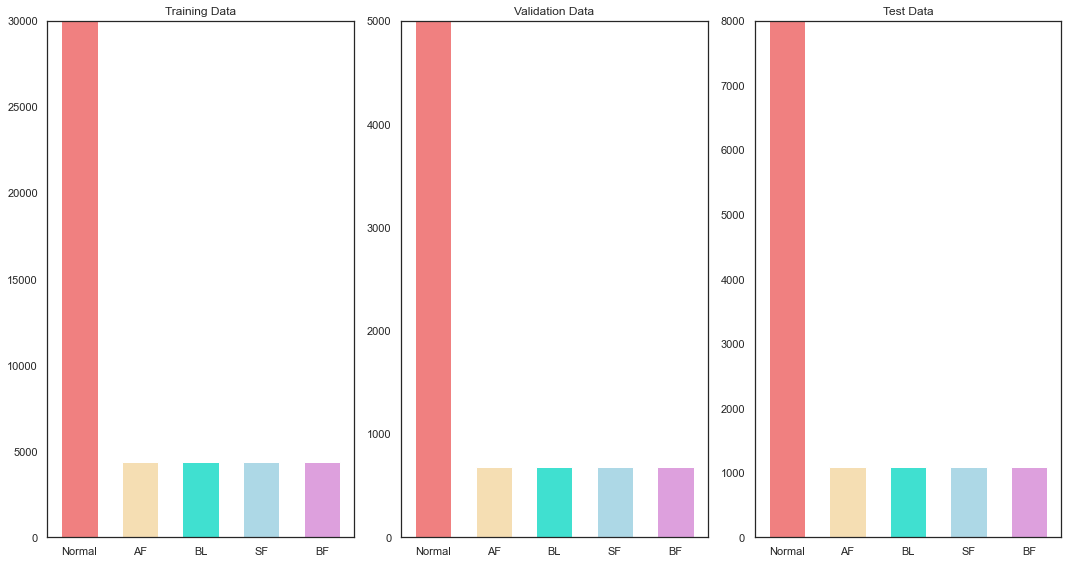

In [173]:
x = np.arange(len(classes))  # Plot의 X축의 개수 구하기

labels = ["Normal", "AF", "BL", "SF", "BF"]   # Plot의 X축의 이름 구하기

values_train = [(cur_y_train_99 == i).sum() for i in classes]  # Train 데이터의 정상/비정상 각 총 개수
values_valid = [(y_valid == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수
values_test = [(cur_y_test_99 == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수

plt.figure(figsize=(15,8))  # Plot 틀(Figure)의 Size 설정 (5X3)

plt.subplot(1,3,1)   # Plot 틀(Figure) 내 3개의 subplot 중 첫 번째(왼쪽) 지정
plt.title("Training Data")  # subplot 제목
plt.bar(x, values_train, width=0.6, color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Train 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 30000])
plt.xticks(x, labels)  # X축에 변수 기입

plt.subplot(1,3,2)  # Plot 틀(Figure) 내 3개의 subplot 중 두 번째(가운데) 지정
plt.title("Validation Data")
plt.bar(x, values_valid, width=0.6,color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 5000])
plt.xticks(x, labels)  

plt.subplot(1,3,3)  # Plot 틀(Figure) 내 3개의 subplot 중 세 번째(오른쪽) 지정
plt.title("Test Data")
plt.bar(x, values_test, width=0.6, color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 8000])
plt.xticks(x, labels)

plt.tight_layout()  # 그림 저장
plt.savefig('99%_data_status.png', dpi=100, bbox_inches='tight')  # 그림 저장
plt.show()  # 그림 출력

# 2. COR 봅시다

In [23]:
cur_corr = pd_cur_train.corr()

<AxesSubplot:>

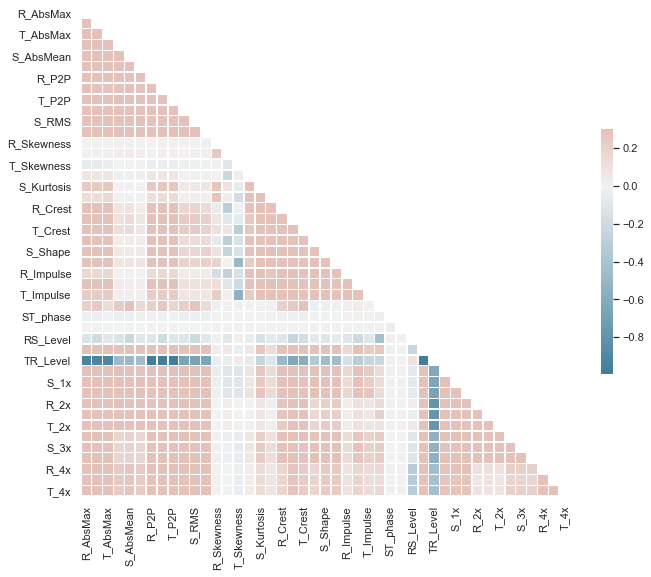

In [24]:
from string import ascii_letters
import seaborn as sns

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

mask = np.triu(np.ones_like(cur_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cur_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##  3. 주성분분석

In [25]:
# RMS(R,S,T)를 기준으로 정상과 고장을 판단하므로, 상관관계 분석을 통해서 RMS 3상과 높은 상관관계를 보이는 변수들은 독립적이지 않다고 판단하여 제거
# T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,T_P2P,S_Skewness,TR_Level (상관관계가 3상과 모두 0.7이상이라 제거)
cur_dropped = cur_corr.drop(["T_AbsMax","R_AbsMean","S_AbsMean","T_AbsMean","R_P2P","T_P2P","S_Skewness","TR_Level"],axis=1)

In [26]:
cur_dropped

,R_AbsMax,S_AbsMax,S_P2P,R_RMS,S_RMS,T_RMS,R_Skewness,T_Skewness,R_Kurtosis,S_Kurtosis,...,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x
R_AbsMax,1.000000,0.994317,0.938397,0.850523,0.847688,0.840450,-0.005086,-0.058268,0.070164,0.251341,...,0.718599,0.721835,0.720640,0.706554,0.531817,0.528552,0.522724,0.454454,0.431979,0.433347
S_AbsMax,0.994317,1.000000,0.946248,0.846036,0.852682,0.832479,0.003056,-0.064461,0.071957,0.256513,...,0.714364,0.713033,0.719505,0.694614,0.534976,0.531323,0.525955,0.474875,0.451071,0.453880
T_AbsMax,0.980649,0.973929,0.919236,0.827150,0.816690,0.834451,0.004248,-0.039532,0.074744,0.267539,...,0.734687,0.708624,0.699757,0.708631,0.543014,0.536798,0.533630,0.457446,0.430984,0.436554
R_AbsMean,0.696293,0.694313,0.479833,0.964513,0.961130,0.953616,-0.010780,-0.006205,-0.023488,-0.000151,...,0.303716,0.413713,0.421266,0.391920,0.186171,0.182629,0.177264,0.253319,0.244642,0.243640
S_AbsMean,0.698192,0.705578,0.499239,0.957030,0.966990,0.938023,-0.009991,-0.006678,-0.022054,0.001386,...,0.303214,0.406038,0.424565,0.377092,0.196228,0.193992,0.187531,0.282170,0.273947,0.272800
T_AbsMean,0.682959,0.677100,0.456269,0.958499,0.947336,0.962629,-0.009750,-0.002755,-0.023588,0.001255,...,0.300221,0.399972,0.400518,0.391290,0.182098,0.177677,0.174445,0.248050,0.237428,0.238350
R_P2P,0.942758,0.940327,0.994008,0.668509,0.670208,0.654463,0.005793,-0.038152,0.067331,0.248643,...,0.703606,0.788759,0.785995,0.774171,0.558223,0.552929,0.548713,0.456819,0.431115,0.434147
S_P2P,0.938397,0.946248,1.000000,0.669215,0.681773,0.651726,0.015298,-0.047187,0.071604,0.261137,...,0.698868,0.769394,0.775496,0.751431,0.562527,0.558889,0.553685,0.488073,0.462753,0.466036
T_P2P,0.933393,0.930597,0.985227,0.657199,0.654140,0.655197,0.016172,-0.034731,0.070922,0.261744,...,0.713869,0.782357,0.774610,0.778415,0.565635,0.558969,0.556965,0.465907,0.437727,0.444048
R_RMS,0.850523,0.846036,0.669215,1.000000,0.993396,0.992894,-0.016865,-0.019921,-0.002129,0.059909,...,0.491184,0.559210,0.561470,0.541951,0.324946,0.318771,0.313916,0.340354,0.323854,0.324561
